In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
# Load data

file_name = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

In [4]:
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
missing_data = df.isnull()
missing_data.head

<bound method NDFrame.head of         date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      False  False     False      False        False     False   False   
1      False  False     False      False        False     False   False   
2      False  False     False      False        False     False   False   
3      False  False     False      False        False     False   False   
4      False  False     False      False        False     False   False   
...      ...    ...       ...        ...          ...       ...     ...   
21608  False  False     False      False        False     False   False   
21609  False  False     False      False        False     False   False   
21610  False  False     False      False        False     False   False   
21611  False  False     False      False        False     False   False   
21612  False  False     False      False        False     False   False   

       waterfront   view  condition  grade  sqft_above  sqft_basement

In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
for column in df.columns:
    
    print('NaN Values in %s' %(column), df[column].isnull().sum())

NaN Values in date 0
NaN Values in price 0
NaN Values in bedrooms 13
NaN Values in bathrooms 10
NaN Values in sqft_living 0
NaN Values in sqft_lot 0
NaN Values in floors 0
NaN Values in waterfront 0
NaN Values in view 0
NaN Values in condition 0
NaN Values in grade 0
NaN Values in sqft_above 0
NaN Values in sqft_basement 0
NaN Values in yr_built 0
NaN Values in yr_renovated 0
NaN Values in zipcode 0
NaN Values in lat 0
NaN Values in long 0
NaN Values in sqft_living15 0
NaN Values in sqft_lot15 0


In [17]:
mean = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean, inplace = True)

In [18]:
mean = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean, inplace = True)

In [19]:
for column in df.columns:
    print("NaN Values in %s" %(column), df[column].isnull().sum())

NaN Values in date 0
NaN Values in price 0
NaN Values in bedrooms 0
NaN Values in bathrooms 0
NaN Values in sqft_living 0
NaN Values in sqft_lot 0
NaN Values in floors 0
NaN Values in waterfront 0
NaN Values in view 0
NaN Values in condition 0
NaN Values in grade 0
NaN Values in sqft_above 0
NaN Values in sqft_basement 0
NaN Values in yr_built 0
NaN Values in yr_renovated 0
NaN Values in zipcode 0
NaN Values in lat 0
NaN Values in long 0
NaN Values in sqft_living15 0
NaN Values in sqft_lot15 0


In [26]:
df['floors'].value_counts().to_frame('number_floors')

,number_floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


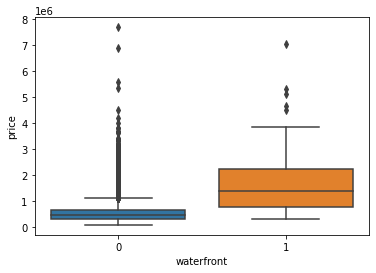

In [27]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)

In [28]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


(0.0, 8081250.0)

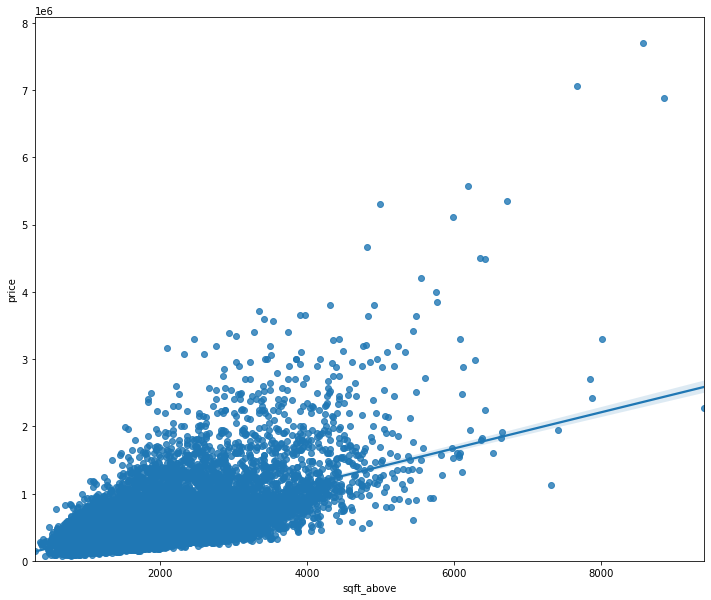

In [30]:
width = 12
height = 10

plt.figure(figsize = (width, height))
sns.regplot(x = 'sqft_above', y = 'price', data = df)
plt.ylim(0, )

In [35]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

## Linear Regression

In [36]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.00046769430149007363

In [37]:
X_1 = df[['sqft_living']]
Y = df['price']
lm1 = LinearRegression()
lm1.fit(X_1, Y)
lm1.score(X_1, Y)

0.49285321790379316

## Multiple Linear Regression

In [42]:
features = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 
            'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]

In [43]:
lm = LinearRegression()
lm.fit(features, df['price'])
lm.intercept_, lm.coef_

(-32390308.398632627,
 array([-2.92790793e+04,  6.02002523e+05,  6.72993098e+05, -2.59674430e+04,
         6.44145022e+01,  6.70824472e+04, -3.22416757e+03,  4.44293114e+00,
         6.49412866e+01,  8.20072277e+04,  1.29355790e+02]))

In [44]:
lm.score(features, df['price'])

0.6576951666037494

### Pipeline

In [46]:
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias = False)), 
         ('model', LinearRegression())]

In [49]:
pipe = Pipeline(Input)
pipe.fit(features, df['price'])
pipe.score(features, df['price'])

0.7513404614351351

## Model Evaluation and Refinement

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print('done')

done


In [51]:
# We split the data

features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 
            'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)

print('number of test samples:', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [52]:
from sklearn.linear_model import Ridge

In [56]:
Ridge_Model = Ridge(alpha = 0.1)
Ridge_Model.fit(x_train, y_train)
Ridge_Model.score(x_test, y_test)

0.6478759163939115

In [57]:
pr = PolynomialFeatures(degree = 2)

x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

Ridge_Model_1 = Ridge(alpha = 0.1)

Ridge_Model_1.fit(x_train_pr, y_train)
Ridge_Model_1.score(x_test_pr, y_test)

0.7002744260973095